In [1]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import matplotlib.style
%matplotlib inline

In [2]:
# reading the CSV file into pandas dataframe
df = pd.read_csv("AirBNB.csv", low_memory=False)

In [3]:
# EDA
df.head()

,id,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,6901257,Entire home/apt,3.0,1.0,strict,True,f,100.0,1.0,1.0,5.010635
1,6304928,Entire home/apt,7.0,1.0,strict,True,t,93.0,3.0,3.0,5.129899
2,7919400,Entire home/apt,5.0,1.0,moderate,True,t,92.0,1.0,3.0,4.976734
3,13418779,Entire home/apt,4.0,1.0,flexible,True,f,NaN,2.0,2.0,6.620073
4,3808709,Entire home/apt,2.0,1.0,moderate,True,t,40.0,0.0,1.0,4.744932


In [4]:
df=df.drop(['id'], axis=1)

In [5]:
df.head()

,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,Entire home/apt,3.0,1.0,strict,True,f,100.0,1.0,1.0,5.010635
1,Entire home/apt,7.0,1.0,strict,True,t,93.0,3.0,3.0,5.129899
2,Entire home/apt,5.0,1.0,moderate,True,t,92.0,1.0,3.0,4.976734
3,Entire home/apt,4.0,1.0,flexible,True,f,NaN,2.0,2.0,6.620073
4,Entire home/apt,2.0,1.0,moderate,True,t,40.0,0.0,1.0,4.744932


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   room_type             74106 non-null  object 
 1   accommodates          74108 non-null  float64
 2   bathrooms             73908 non-null  float64
 3   cancellation_policy   74103 non-null  object 
 4   cleaning_fee          74107 non-null  object 
 5   instant_bookable      74111 non-null  object 
 6   review_scores_rating  57389 non-null  float64
 7   bedrooms              74019 non-null  float64
 8   beds                  73980 non-null  float64
 9   log_price             74111 non-null  float64
dtypes: float64(6), object(4)
memory usage: 5.7+ MB


In [7]:
df.describe(include="all")

,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
count,74106,74108.000000,73908.000000,74103,74107,74111,57389.000000,74019.000000,73980.000000,74111.000000
unique,3,NaN,NaN,3,2,2,NaN,NaN,NaN,NaN
top,Entire home/apt,NaN,NaN,strict,True,f,NaN,NaN,NaN,NaN
freq,41308,NaN,NaN,32500,54399,54660,NaN,NaN,NaN,NaN
mean,NaN,3.155125,1.235272,NaN,NaN,NaN,94.067365,1.265797,1.710868,4.782069
std,NaN,2.153603,0.582054,NaN,NaN,NaN,7.836556,0.852149,1.254142,0.717394
min,NaN,1.000000,0.000000,NaN,NaN,NaN,20.000000,0.000000,0.000000,0.000000
25%,NaN,2.000000,1.000000,NaN,NaN,NaN,92.000000,1.000000,1.000000,4.317488
50%,NaN,2.000000,1.000000,NaN,NaN,NaN,96.000000,1.000000,1.000000,4.709530
75%,NaN,4.000000,1.000000,NaN,NaN,NaN,100.000000,1.000000,2.000000,5.220356


In [8]:
# categorical values
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

ROOM_TYPE :  3
room_type
Shared room         2163
Private room       30635
Entire home/apt    41308
Name: count, dtype: int64


CANCELLATION_POLICY :  3
cancellation_policy
moderate    19060
flexible    22543
strict      32500
Name: count, dtype: int64


CLEANING_FEE :  2
cleaning_fee
False    19708
True     54399
Name: count, dtype: int64


INSTANT_BOOKABLE :  2
instant_bookable
t    19451
f    54660
Name: count, dtype: int64




In [9]:
# converting f and t to boolean
df['instant_bookable']= df['instant_bookable'].replace({'f':False,'t':True})

C:\Users\Nathan\AppData\Local\Temp\ipykernel_1632\3169525905.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['instant_bookable']= df['instant_bookable'].replace({'f':False,'t':True})


In [10]:
# converting categorical to dummy variables
df['instant_bookable'].astype(int)

0        0
1        1
2        1
3        0
4        1
        ..
74106    0
74107    0
74108    1
74109    1
74110    0
Name: instant_bookable, Length: 74111, dtype: int64

In [11]:
df = pd.get_dummies(df, columns=['room_type','cancellation_policy','cleaning_fee', 'instant_bookable'],drop_first=True)
df.head()

,accommodates,bathrooms,review_scores_rating,bedrooms,beds,log_price,room_type_Private room,room_type_Shared room,cancellation_policy_moderate,cancellation_policy_strict,cleaning_fee_True,instant_bookable_True
0,3.0,1.0,100.0,1.0,1.0,5.010635,False,False,False,True,True,False
1,7.0,1.0,93.0,3.0,3.0,5.129899,False,False,False,True,True,True
2,5.0,1.0,92.0,1.0,3.0,4.976734,False,False,True,False,True,True
3,4.0,1.0,NaN,2.0,2.0,6.620073,False,False,False,False,True,False
4,2.0,1.0,40.0,0.0,1.0,4.744932,False,False,True,False,True,True


In [12]:
# checking null values
df.isnull().sum()

accommodates                        3
bathrooms                         203
review_scores_rating            16722
bedrooms                           92
beds                              131
log_price                           0
room_type_Private room              0
room_type_Shared room               0
cancellation_policy_moderate        0
cancellation_policy_strict          0
cleaning_fee_True                   0
instant_bookable_True               0
dtype: int64

In [13]:
# filling null values
for column in df.columns:
    if df[column].dtype != 'object':
        mean = df[column].mean()
        df[column] = df[column].fillna(mean)

df.isnull().sum()

accommodates                    0
bathrooms                       0
review_scores_rating            0
bedrooms                        0
beds                            0
log_price                       0
room_type_Private room          0
room_type_Shared room           0
cancellation_policy_moderate    0
cancellation_policy_strict      0
cleaning_fee_True               0
instant_bookable_True           0
dtype: int64

In [14]:
df.describe()

,accommodates,bathrooms,review_scores_rating,bedrooms,beds,log_price
count,74111.000000,74111.000000,74111.000000,74111.000000,74111.000000,74111.000000
mean,3.155125,1.235272,94.067365,1.265797,1.710868,4.782069
std,2.153559,0.581256,6.896002,0.851620,1.253033,0.717394
min,1.000000,0.000000,20.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,93.000000,1.000000,1.000000,4.317488
50%,2.000000,1.000000,94.067365,1.000000,1.000000,4.709530
75%,4.000000,1.000000,99.000000,1.000000,2.000000,5.220356
max,16.000000,8.000000,100.000000,10.000000,18.000000,7.600402


In [15]:
# checking for duplicates
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 19998


In [16]:
df.drop_duplicates(inplace=True)

In [17]:
# rechecking for duplicates
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


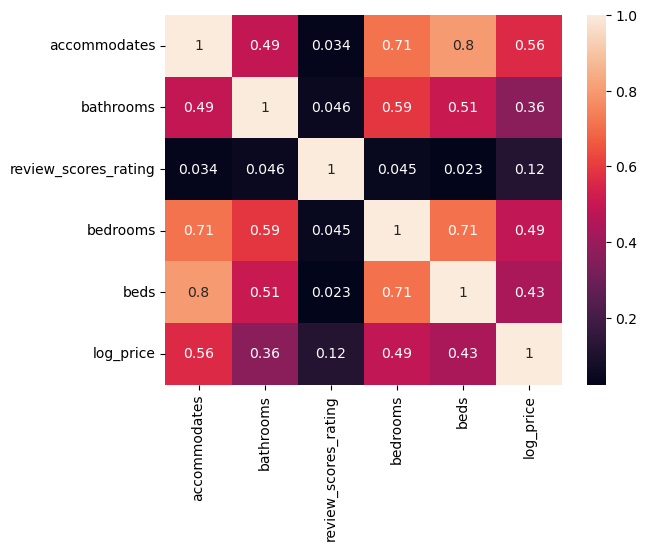

In [18]:
# correlation plot
sns.heatmap(df.iloc[:, 0:6].corr(),annot=True)
plt.show()

In [19]:
# outlier checking
cont=df.dtypes[(df.dtypes!='uint8') & (df.dtypes!='bool')].index
plt.figure(figsize=(10,10))
df[cont].boxplot(vert=0)
plt.title('With Outliers',fontsize=16)
plt.show()

AssertionError: 2

In [20]:
# removing outliers
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

for column in df[cont].columns:
    lr,ur=remove_outlier(df[column])
    df[column]=np.where(df[column]>ur,ur,df[column])
    df[column]=np.where(df[column]<lr,lr,df[column])

In [21]:
plt.figure(figsize=(10,10))
df[cont].boxplot(vert=0)
plt.title('After Outlier Removal',fontsize=16)
plt.show()

AssertionError: 2

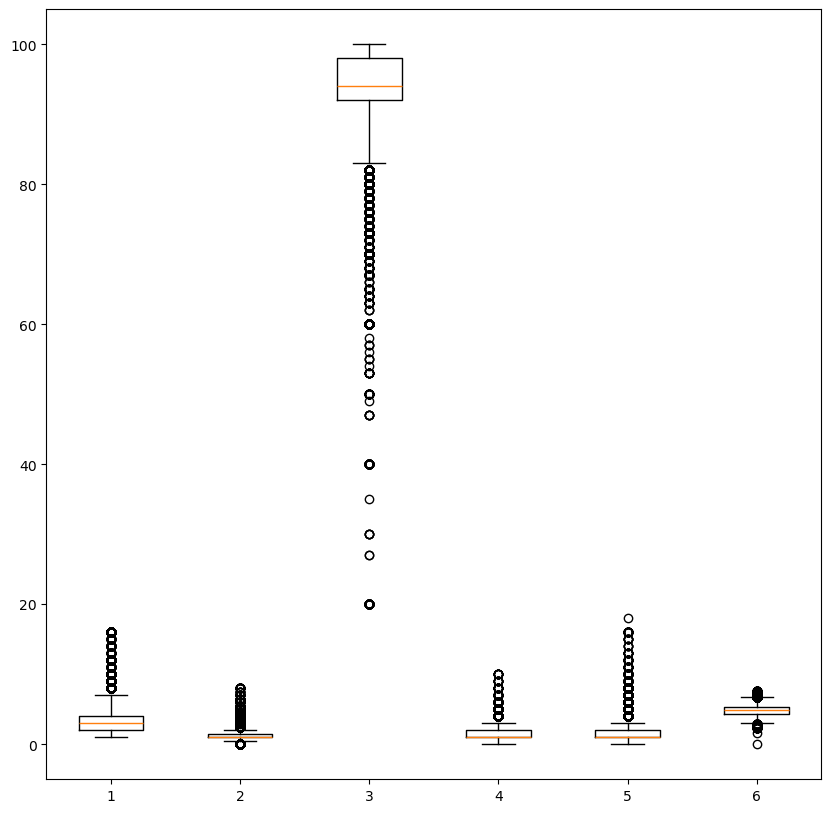

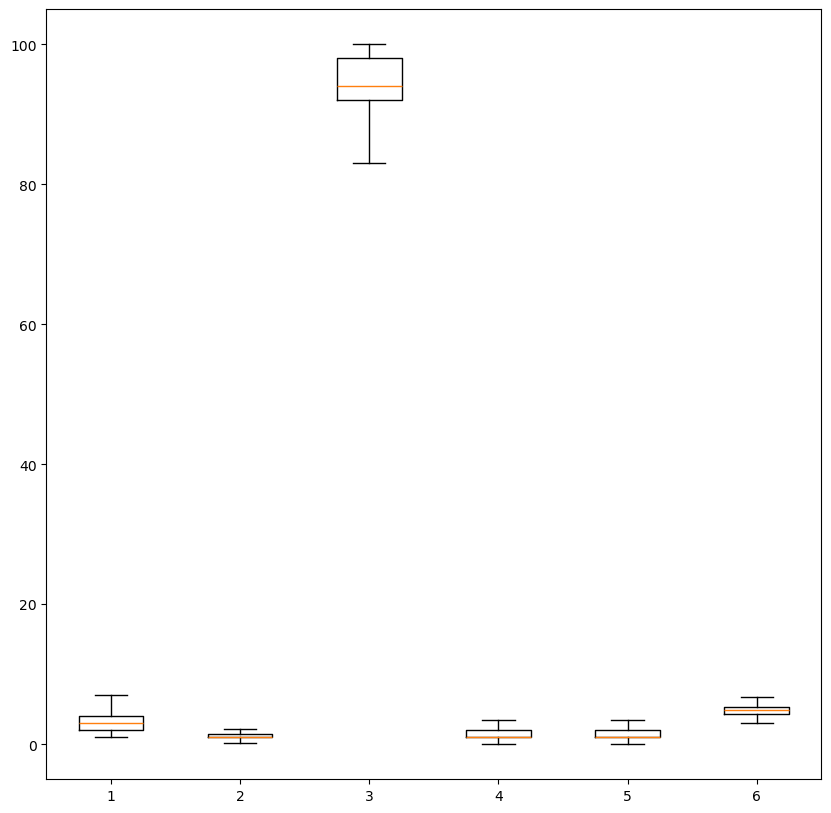

In [ ]:
df_attr = (df[cont])
sns.pairplot(df_attr, diag_kind='kde')
plt.show()

In [ ]:
# train-test split
x = df.drop('log_price', axis=1)
y = df[['log_price']]

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20 , random_state=1)

In [ ]:
# linear regression model
regression_model= LinearRegression()
regression_model.fit(x_train,y_train)

In [ ]:
for idx, col_name in enumerate(x_train.columns):
  print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

In [ ]:
# R square on training data
regression_model.score(x_train, y_train)

In [ ]:
# R square on testing data
regression_model.score(x_test, y_test)

In [ ]:
# RMSE on Training data
predicted_train=regression_model.fit(x_train, y_train).predict(x_train)
np.sqrt(metrics.mean_squared_error(y_train,predicted_train))

In [ ]:
# RMSE on Testing data
predicted_test=regression_model.fit(x_train, y_train).predict(x_test)
np.sqrt(metrics.mean_squared_error(y_test,predicted_test))